<a href="https://colab.research.google.com/github/adanmgs/Seminario/blob/master/MProyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seminario de Profesionalización en Ciencia de Datos

**Carga de información y de librerías**

In [3]:
try:
    !rm -rf Seminario
except:
    print("No existe la ruta aún")

!git clone "https://github.com/adanmgs/Seminario"

Cloning into 'Seminario'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 60 (delta 9), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (60/60), done.


In [0]:
#Cargar módulo de R en Python
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load in the r magic
%reload_ext rpy2.ipython
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'


In [0]:
%%R
#Instalamos las bibliotecas que utilizaremos
install.packages("MPDiR")    # Donde estan los datos Chromatic
install.packages("dplyr")    # Para manipulación de datos
install.packages("ggplot2")  # Para poder gráficar
install.packages("lattice")  # Para poder graficar xyplot y condicionados
install.packages("readxl")   # Para abrir archivos en excel
install.packages("MASS")     # Para hacer regresiones de tipo binomial negativa
install.packages("caret")
install.packages("caret")    # Permite evaluar los modelos de regresion
install.packages("plotly")   # Para hacer gráficos dinámicos
install.packages("mlbench")  # Permite obtener los datos de Sonar
install.packages("e1071")    # Solucion error caret
install.packages("caTools")  # Permite calcular el score AUC de la Curva ROC
install.packages("matlib")
install.packages("aod")
install.packages("sampling")
install.packages("psych")
install.packages("boot")
install.packages("GGally")

#  Muestreo
install.packages("splitstackshape")

install.packages("corrplot")


In [0]:
%%R
library(MPDiR)    # Donde estan los datos Chromatic
library(dplyr)    # Para manipulación de datos
library(ggplot2)  # Para poder gráficar
library(lattice)  # Para poder graficar xyplot y condicionados
library(readxl)   # Para abrir archivos en excel
library(MASS)     # Para hacer regresiones de tipo binomial negativa
library(caret)
library(caret)    # Permite evaluar los modelos de regresion
library(plotly)   # Para hacer gráficos dinámicos
library(mlbench)  # Permite obtener los datos de Sonar
library(e1071)    # Solucion error caret
library(caTools)  # Permite calcular el score AUC de la Curva ROC
library(matlib)
library(aod)
library(sampling)
library(psych)
library(boot)
library(GGally)
#  Muestreo
library(splitstackshape)

library("corrplot")

In [60]:
%%R
# Leo los datos del archivo
# personas <- read.csv("/content/Seminario/data/interrupcion-legal-del-embarazo.csv", header=T, na.strings=c("","NA"), sep=",", stringsAsFactors=FALSE)
personas <- read.csv("/content/Seminario/data/interrupcion-legal-del-embarazo.csv", header = TRUE, sep = ";", quote = "\"'")
str(personas)
# ?read.csv
summary(personas)
head(personas)


'data.frame':	9084 obs. of  14 variables:
 $ CVE_HOSPITAL        : int  12 12 12 12 12 12 12 12 12 12 ...
 $ FINGRESO            : Factor w/ 162 levels "01/02/19","01/03/19",..: 10 16 16 30 30 42 47 53 69 69 ...
 $ EDOCIVIL_DESCRIPCION: Factor w/ 6 levels "casada","divorciada",..: 4 5 5 4 3 4 5 4 5 1 ...
 $ EDAD                : int  25 33 25 25 25 22 19 21 26 32 ...
 $ MENARCA             : int  15 13 14 14 9 12 12 13 12 12 ...
 $ FSEXUAL             : int  19 21 20 16 16 18 16 18 17 16 ...
 $ SEMEMB              : num  6 9 8 5 7 8 6 12 7 5 ...
 $ NHIJOS              : int  0 2 0 1 2 0 0 0 0 1 ...
 $ GESTA               : int  2 3 1 2 3 1 1 1 2 3 ...
 $ NABORTO             : int  1 0 0 0 0 0 0 0 1 1 ...
 $ NPARTOS             : int  0 1 0 1 2 0 0 0 0 1 ...
 $ NCESAREA            : int  0 1 0 0 0 0 0 0 0 0 ...
 $ NILE                : int  0 0 0 0 0 0 0 0 1 1 ...
 $ C_NUM               : int  2 1 1 2 2 2 2 1 1 2 ...
  CVE_HOSPITAL FINGRESO EDOCIVIL_DESCRIPCION EDAD MENARCA FSEXUAL SEME

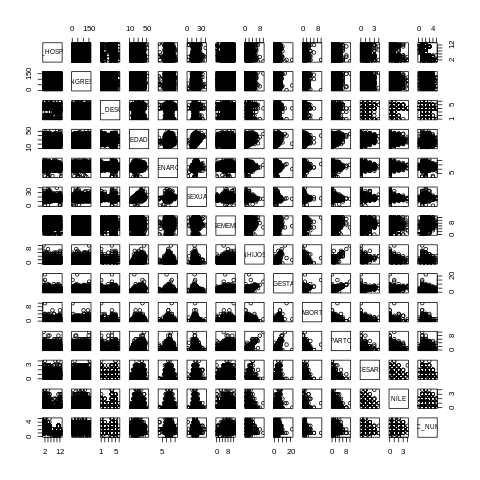

In [61]:
%%R
# quien sabe que pase al querer hacer plot
plot(personas)
# 


In [67]:
%%R
# Se genera un modelo en base a las columnas
# EDAD, SEMEMB, NHIJOS, NABORTO, NPARTOS
modelo <- lm(EDAD~ SEMEMB + NHIJOS + NABORTO + NPARTOS, data = personas)
summary(modelo)




Call:
lm(formula = EDAD ~ SEMEMB + NHIJOS + NABORTO + NPARTOS, data = personas)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.7003  -3.6344  -0.7575   2.8985  22.7752 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  23.7865     0.2246 105.899  < 2e-16 ***
SEMEMB       -0.1872     0.0284  -6.592 4.63e-11 ***
NHIJOS        3.3457     0.1002  33.376  < 2e-16 ***
NABORTO       1.2815     0.1272  10.077  < 2e-16 ***
NPARTOS      -0.2591     0.1059  -2.447   0.0144 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.148 on 7890 degrees of freedom
  (1189 observations deleted due to missingness)
Multiple R-squared:  0.3143,	Adjusted R-squared:  0.314 
F-statistic: 904.2 on 4 and 7890 DF,  p-value: < 2.2e-16

